In [1]:
from transformers import pipeline

# Load a pre-trained NER model
nlp_ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english")

# Example text for NER
text = "OpenAI, based in San Francisco, is known for creating GPT models."

# Run NER
ner_results = nlp_ner(text)

# Print the NER results
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}, Score: {entity['score']:.2f}")


C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deepp\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Entity: Open, Label: I-ORG, Score: 1.00
Entity: ##A, Label: I-ORG, Score: 1.00
Entity: ##I, Label: I-ORG, Score: 1.00
Entity: San, Label: I-LOC, Score: 1.00
Entity: Francisco, Label: I-LOC, Score: 1.00


In [2]:
text = "Nomura announces we will donate million yen to support relief efforts in areas affected by the recent earthquake that struck Japans Noto Peninsula. Nomura extends its deepest condolences to the victims and their families and we pray for a swift recovery from this disaster."

# Run NER
ner_results = nlp_ner(text)

# Print the NER results
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}, Score: {entity['score']:.2f}")

Entity: No, Label: I-ORG, Score: 1.00
Entity: ##mura, Label: I-ORG, Score: 1.00
Entity: Japan, Label: I-MISC, Score: 0.96
Entity: Not, Label: I-LOC, Score: 0.99
Entity: ##o, Label: I-LOC, Score: 0.98
Entity: Peninsula, Label: I-LOC, Score: 0.99
Entity: No, Label: I-ORG, Score: 1.00
Entity: ##mura, Label: I-ORG, Score: 1.00


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


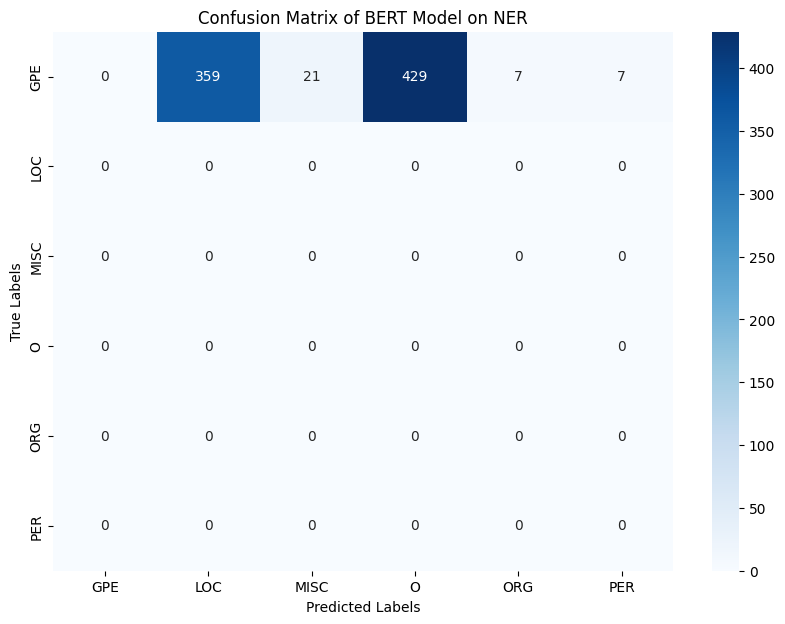

              precision    recall  f1-score   support

         GPE       0.00      0.00      0.00     823.0
         LOC       0.00      0.00      0.00       0.0
        MISC       0.00      0.00      0.00       0.0
           O       0.00      0.00      0.00       0.0
         ORG       0.00      0.00      0.00       0.0
         PER       0.00      0.00      0.00       0.0

    accuracy                           0.00     823.0
   macro avg       0.00      0.00      0.00     823.0
weighted avg       0.00      0.00      0.00     823.0



C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [4]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from sklearn.metrics import confusion_matrix, classification_report
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tokenizer and pre-trained BERT model for NER
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Function to load test data
def load_test_data(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    test_data = []
    for line in lines:
        entry = json.loads(line)
        text = entry[0]
        entities = entry[1]["entities"]
        test_data.append((text, {"entities": entities}))
    return test_data

# Load and clean test data
test_data = load_test_data("randomtest.jsonl")

# Lists to store true and predicted entities
true_entities = []
predicted_entities = []

for text, annotations in test_data:
    # True entities
    true_ents = [(ent[0], ent[1], ent[2]) for ent in annotations["entities"]]
    true_entities.append(true_ents)
    
    # Predicted entities
    pred_ents = nlp_ner(text)
    # Adjust for the output format of the Hugging Face pipeline
    pred_ents = [(ent["start"], ent["end"], ent["entity_group"]) for ent in pred_ents]
    predicted_entities.append(pred_ents)

# Align true and predicted entities
aligned_true = []
aligned_pred = []

for true_ents, pred_ents in zip(true_entities, predicted_entities):
    true_labels = ['O'] * len(true_ents)
    pred_labels = ['O'] * len(true_ents)  # Initialize predictions as 'O' (no entity)
    
    for i, (true_start, true_end, true_label) in enumerate(true_ents):
        true_labels[i] = true_label  # Assign the true label
        
        # Check if there is a matching predicted entity at this location
        for pred_start, pred_end, pred_label in pred_ents:
            if pred_start == true_start and pred_end == true_end:
                pred_labels[i] = pred_label  # Assign the predicted label
                
    # Add the aligned labels for this sentence
    aligned_true.extend(true_labels)
    aligned_pred.extend(pred_labels)

# Create a mapping from labels to indices
labels = sorted(set(aligned_true + aligned_pred))
label_to_index = {label: i for i, label in enumerate(labels)}

# Convert labels to indices for confusion matrix
true_indices = [label_to_index[label] for label in aligned_true]
pred_indices = [label_to_index[label] for label in aligned_pred]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_indices, pred_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix of BERT Model on NER')
plt.show()

# Print classification report for more detailed metrics
print(classification_report(true_indices, pred_indices, target_names=labels))


In [1]:
from transformers import AutoTokenizer, GPTNeoForTokenClassification, pipeline
from sklearn.metrics import confusion_matrix, classification_report
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tokenizer and GPT-Neo model for token classification
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
model = GPTNeoForTokenClassification.from_pretrained("EleutherAI/gpt-neo-125M", num_labels=2)  # Adjust labels as needed
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")


C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Some weights of GPTNeoForTokenClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-125M and are newly initialized: ['classifier.weight', 'classifier.bias']
You should p

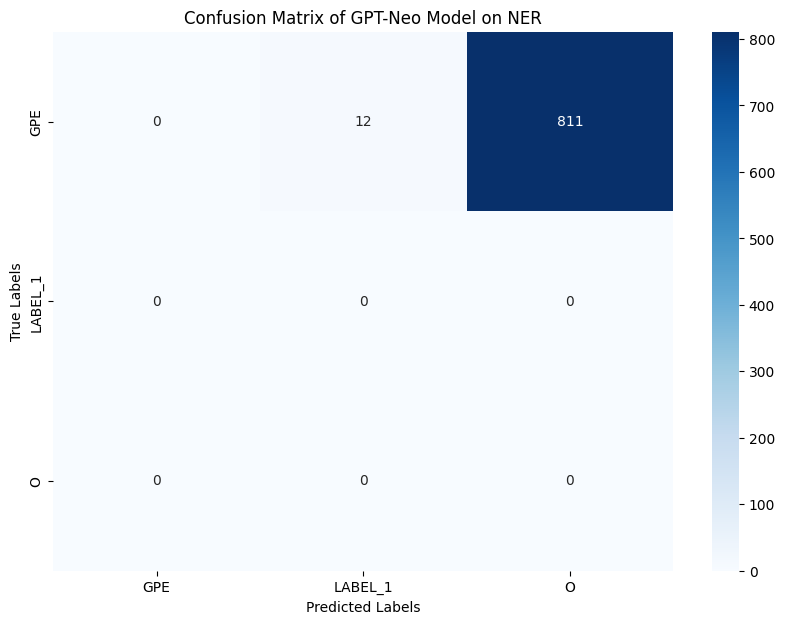

              precision    recall  f1-score   support

         GPE       0.00      0.00      0.00     823.0
     LABEL_1       0.00      0.00      0.00       0.0
           O       0.00      0.00      0.00       0.0

    accuracy                           0.00     823.0
   macro avg       0.00      0.00      0.00     823.0
weighted avg       0.00      0.00      0.00     823.0



C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [2]:
def load_test_data(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    test_data = []
    for line in lines:
        entry = json.loads(line)
        text = entry[0]
        entities = entry[1]["entities"]
        test_data.append((text, {"entities": entities}))
    return test_data

# Load test data
test_data = load_test_data("randomtest.jsonl")

# Lists to store true and predicted entities
true_entities = []
predicted_entities = []

for text, annotations in test_data:
    # True entities
    true_ents = [(ent[0], ent[1], ent[2]) for ent in annotations["entities"]]
    true_entities.append(true_ents)
    
    # Predicted entities
    pred_ents = nlp_ner(text)
    # Adjust for the output format of the Hugging Face pipeline
    pred_ents = [(ent["start"], ent["end"], ent["entity_group"]) for ent in pred_ents]
    predicted_entities.append(pred_ents)

# Align true and predicted entities
aligned_true = []
aligned_pred = []

for true_ents, pred_ents in zip(true_entities, predicted_entities):
    true_labels = ['O'] * len(true_ents)
    pred_labels = ['O'] * len(true_ents)  # Initialize predictions as 'O' (no entity)
    
    for i, (true_start, true_end, true_label) in enumerate(true_ents):
        true_labels[i] = true_label  # Assign the true label
        
        # Check if there is a matching predicted entity at this location
        for pred_start, pred_end, pred_label in pred_ents:
            if pred_start == true_start and pred_end == true_end:
                pred_labels[i] = pred_label  # Assign the predicted label
                
    # Add the aligned labels for this sentence
    aligned_true.extend(true_labels)
    aligned_pred.extend(pred_labels)

# Create a mapping from labels to indices
labels = sorted(set(aligned_true + aligned_pred))
label_to_index = {label: i for i, label in enumerate(labels)}

# Convert labels to indices for confusion matrix
true_indices = [label_to_index[label] for label in aligned_true]
pred_indices = [label_to_index[label] for label in aligned_pred]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_indices, pred_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of GPT-Neo Model on NER')
plt.show()

# Print classification report for more detailed metrics
print(classification_report(true_indices, pred_indices, target_names=labels))

In [ ]:
test_data = load_test_data("train/train_data_1.jsonl")

# Lists to store true and predicted entities
true_entities = []
predicted_entities = []

for text, annotations in test_data:
    # True entities
    true_ents = [(ent[0], ent[1], ent[2]) for ent in annotations["entities"]]
    true_entities.append(true_ents)
    
    # Predicted entities
    pred_ents = nlp_ner(text)
    # Adjust for the output format of the Hugging Face pipeline
    pred_ents = [(ent["start"], ent["end"], ent["entity_group"]) for ent in pred_ents]
    predicted_entities.append(pred_ents)

# Align true and predicted entities
aligned_true = []
aligned_pred = []

for true_ents, pred_ents in zip(true_entities, predicted_entities):
    true_labels = ['O'] * len(true_ents)
    pred_labels = ['O'] * len(true_ents)  # Initialize predictions as 'O' (no entity)
    
    for i, (true_start, true_end, true_label) in enumerate(true_ents):
        true_labels[i] = true_label  # Assign the true label
        
        # Check if there is a matching predicted entity at this location
        for pred_start, pred_end, pred_label in pred_ents:
            if pred_start == true_start and pred_end == true_end:
                pred_labels[i] = pred_label  # Assign the predicted label
                
    # Add the aligned labels for this sentence
    aligned_true.extend(true_labels)
    aligned_pred.extend(pred_labels)

# Create a mapping from labels to indices
labels = sorted(set(aligned_true + aligned_pred))
label_to_index = {label: i for i, label in enumerate(labels)}

# Convert labels to indices for confusion matrix
true_indices = [label_to_index[label] for label in aligned_true]
pred_indices = [label_to_index[label] for label in aligned_pred]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_indices, pred_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of GPT-Neo Model on NER')
plt.show()

# Print classification report for more detailed metrics
print(classification_report(true_indices, pred_indices, target_names=labels))